# Dowdle's Titanic Survival Prediction
**Author:** Brittany Dowdle  
**Date:** March, 19, 2025  
**Objective:** To inspect, explore, and split data. Compare data splitting methods: train/test split and stratified shuffle split, by evaluating model performance.


## Introduction
This project uses the Titanic dataset to predict survival based on features such as class, sex, and family size. I will clean the data, do some feature engineering, and explore ways to improve performance. This project highlights the importance of balanced data representation.

****

## Imports
In the code cell below, import the necessary Python libraries for this notebook. All imports should be at the top of the notebook. 

In [2]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

from pandas.plotting import scatter_matrix

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

****
## Section 1. Import and Inspect the Data

### Load the titanic dataset from the directly from the seaborn library for consistency and simplicity.
- Display basic information about the dataset using the info() method.
- Display the first 10 rows.
- Check for missing values using the isnull() method and then the sum() method. 
- Display summary statistics using the describe() method
- Check for correlations using the corr() method and tell it to use only the numeric features.

In [3]:
# Load the data
titanic = sns.load_dataset('titanic')

# If command is not the last statement in a Python cell, you'll have to wrap in the print() function to display.
print('Info:')
print(titanic.info())
print('First 10 Rows:')
print(titanic.head(10))
print('Missing Values:')
print(titanic.isnull().sum())
print('Summary Statistics:')
print(titanic.describe())
print('Numeric Correlations:')
print(titanic.corr(numeric_only=True))

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
First 10 Rows:
   survived  pclass     sex   age  sibsp  parch     f

### Reflection 1:
1) How many data instances are there? **891 data instances (rows)**
2) How many features are there? **15 features (columns)**
3) What are the names? **Survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone**
4) Are there any missing values? **Yes, missing values exist in: age (177 missing values), embarked (2 missing values), deck (688 missing values), and embark_town (2 missing values)**
5) Are there any non-numeric features? **Yes, the following are non-numeric: sex (object), embarked (object), class (category), who (object), deck (category), embark_town (object), alive (object)**
6) Are the data instances sorted on any of the attributes? **There is no indication it is**
7) What are the units of age? **Years**
8) What are the minimum, median and max age? **Minimum: 0.42, Median: 28.0, Maximum: 80.0**
9) What two different features have the highest correlation? **sibsp (number of siblings/spouses aboard) and parch (number of parents/children aboard) have the highest correlation of 0.414838**
10) Are there any categorical features that might be useful for prediction? **Gender, ticket class, and whether the passenger was alone could influence survival probability**

****

## Section 2. Data Exploration and Preparation
Now we need to explore our dataset with charts, we might need to clean it, and maybe do some feature engineering. learning to figure out what you need is a key skill.

### 2.1 Explore Data Patterns and Distributions

- Create a scatter matrix. Since Titanic contains both numeric and categorical variables, we'll use only numeric values here.
- Create a scatter plot of age vs fare, colored by gender.
- Create a histogram of age.
- Create a count plot for class and survival.

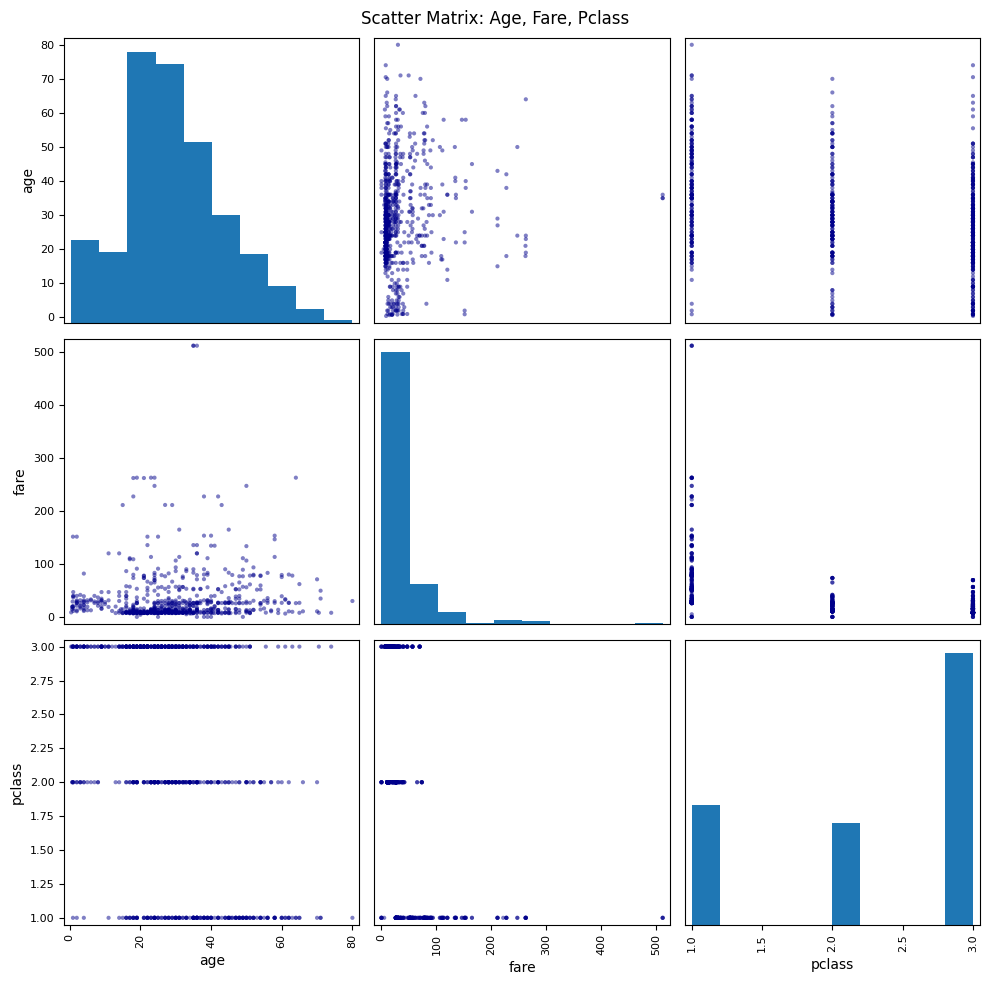

In [4]:
# Create scatter matrix. Use only numeric attributes for the scatter matrix. 
# If you want to explore categorical data, use count plots and bar plots instead.

# Select only numeric features
attributes = ['age', 'fare', 'pclass']
# Create scatter matrix
scatter_matrix(titanic[attributes], figsize=(10, 10), color='darkblue')

# Title
plt.suptitle("Scatter Matrix: Age, Fare, Pclass")
# Show the plot
plt.tight_layout()
plt.show()

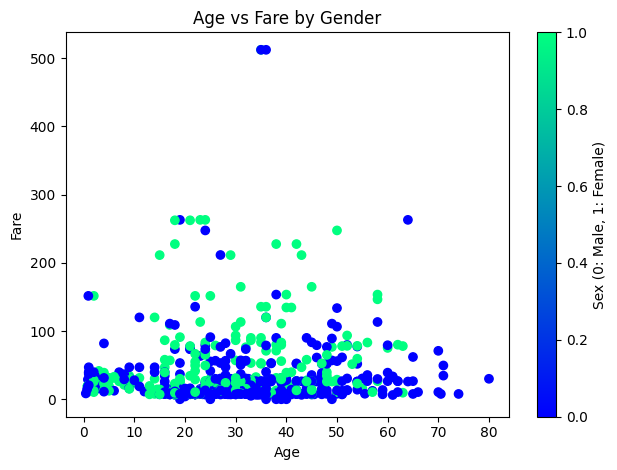

In [5]:
# Create a scatter plot of age vs fare, colored by gender
# Convert 'sex' to numerical values (0 for male, 1 for female)
sex_numeric = titanic['sex'].apply(lambda x: 0 if x == 'male' else 1)

# Create scatter plot with colormap
plt.scatter(titanic['age'], titanic['fare'], c=sex_numeric, cmap='winter')
# Add colorbar to indicate mapping
plt.colorbar(label="Sex (0: Male, 1: Female)")

# Labels and titles
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
# Show plot
plt.tight_layout()
plt.show()

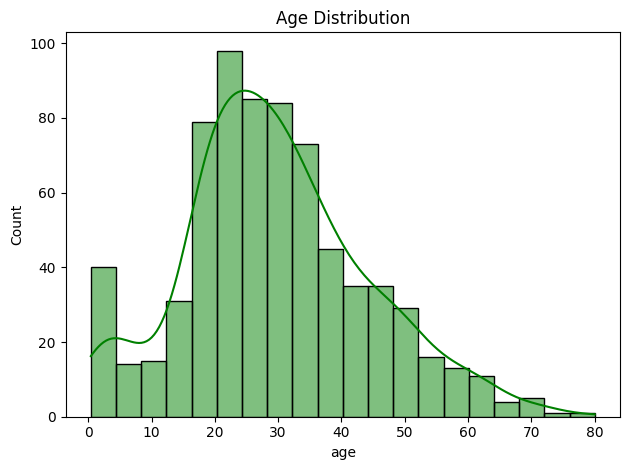

In [6]:
# Create a histogram of age
sns.histplot(titanic['age'], kde=True, color='green')

# Title
plt.title('Age Distribution')
# Show the plot
plt.tight_layout()
plt.show()

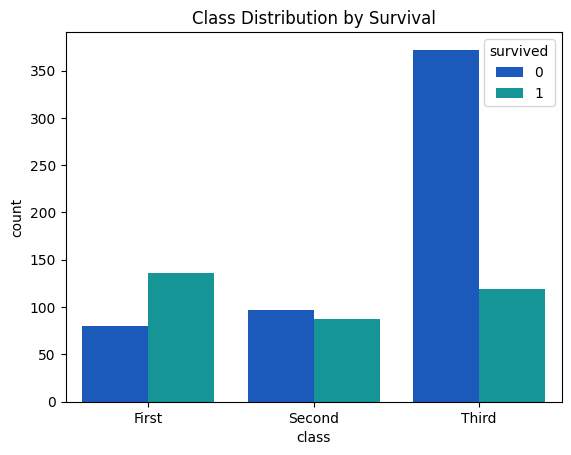

In [7]:
# Create a count plot for class and survival
sns.countplot(x='class', hue='survived', data=titanic, palette='winter')

# Title
plt.title('Class Distribution by Survival')
# Show the plot
plt.tight_layout
plt.show()

### Reflection 2.1:
1) What patterns or anomalies do you notice? **There is a strong correlation between fare and class, but some outliers in fare. Age is skewed indicating more young passengers, but there are a high number of missing values.**
2) Do any features stand out as potential predictors? **Class and sex.**
3) Are there any visible class imbalances? **There is a clear separation between first and third class fares. And there is a significant imbalance of third-class being the majority of passengers and having a much lower survival rate.**

### 2.2 Handle Missing Values and Clean Data

- Age was missing values. We can impute missing values for age using the median.
- Embark_town was missing values. We can drop missing values for embark_town (or fill with mode).

In [8]:
# Fill missing age values with median
titanic.loc[:, 'age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing embark_town values with mode
titanic.loc[:, 'embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.3 Feature Engineering

- Create a new feature: Family size.
- Convert categorical data to numeric.
- Create a binary feature for 'alone'.

In [9]:
# Create new feature 'family size'
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical data to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create binary feature 'alone'
titanic['alone'] = titanic['alone'].astype(int)

### Reflection 2.3

1) Why might family size be a useful feature for predicting survival? **Passengers traveling with family members might have had a higher chance of survival due to social dynamics of the time prioritizing women and children. Or very large families may have struggled to stay together, reducing their survival odds.**
2) Why convert categorical data to numeric? **Mapping categories to numbers ensures that models can identify patterns and relationships between features and the target variable (survival). Machine learning models and statistical algorithms typically require numerical input.**

****

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
For classification you need a categorical target variable (e.g., gender, species). Select two or more input features.

>Target: survived
>
>Input features: age, fare, pclass, sex, family_size

### 3.2 Define X and y

- Assign input features to X
- Assign target variable to y (as applicable)

In [10]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

### Reflection 3:

1) Why are these features selected? **Age captures the advantage of younger passengers, fare and class because typically first class costs more and had the highest survival rate, sex and family size for life boat prioritization.**
2) Are there any features that are likely to be highly predictive of survival? **Yes, sex first, as women represented a larger share of higher fares. Pclass next, with first-class passengers surviving at much higher rates than those in third class.**

****

## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

### 4.1 Basic Train/Test split

In [11]:
# Split data into a training set and a test set
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=123)

# Show set sizes
print('Train size:', len(X_train_b))
print('Test size:', len(X_test_b))

Train size: 712
Test size: 179


### 4.2 Stratified Train/Test split

In [12]:
# Define how many splits, % of data for testing, and ensure reproducibility
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Split data into a training set and a test set
for train_indices, test_indices in splitter.split(X, y):
    X_train_s = X.iloc[train_indices]
    X_test_s = X.iloc[test_indices]
    y_train_s = y.iloc[train_indices]
    y_test_s = y.iloc[test_indices]

# Show set sizes
print('Train size:', len(X_train_s))
print('Test size:', len(X_test_s))

Train size: 712
Test size: 179


### 4.3 Compare Results

In [13]:
print("\nOriginal Class Distribution:\n", y.value_counts(normalize=True))
print("\nBasic Split Distribution - Train Set:\n", y_train_b.value_counts(normalize=True))
print("\nBasic Split Distribution - Test Set:\n", y_test_b.value_counts(normalize=True))
print("\nStratified Split Distribution - Train Set:\n", y_train_s.value_counts(normalize=True))
print("\nStratified Split Distribution - Test Set:\n", y_test_s.value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Split Distribution - Train Set:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64

Basic Split Distribution - Test Set:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified Split Distribution - Train Set:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Stratified Split Distribution - Test Set:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


### Reflection 4:

1) Why might stratification improve model performance? **The dataset was imbalanced across class, and stratification ensures that both the training and test sets maintain the same class distribution as the original dataset. It helps the model learn from a more representative sample of the data, which leads to more reliable performance.**
2) How close are the training and test distributions to the original dataset? **Stratified - the distributions for both the training and test sets are very similar to the original proportions. Basic Split - some deviation in the test set, where Class 0 is slightly overrepresented.**
3) Which split method produced better class balance? **Stratified Split produced a better class balance because it preserved the original class proportions more accurately in both the training and test sets.**